In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from sklearn.datasets import make_blobs, make_classification
from sklearn.preprocessing import StandardScaler

In [ ]:
def plot_voronoi2d(clf, X, y, shape=(50, 50)):
  x1_botbound = X[:, 0].min() - X[:, 0].max()/3
  x1_topbound = X[:, 0].max() + X[:, 0].max()/3
  x2_botbound = X[:, 1].min() - X[:, 1].max()/3
  x2_topbound = X[:, 1].max() + X[:, 1].max()/3

  x1 = np.linspace(x1_botbound, x1_topbound, shape[0])
  x2 = np.linspace(x2_botbound, x2_topbound, shape[1])
  xx1, xx2 = np.meshgrid(x1, x2)

  Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
  Z = Z.reshape(shape)
  plt.contourf(xx1, xx2, Z, cmap="rainbow")
  plt.scatter(*zip(*X), c=y, edgecolors="b")

  return xx1, xx2, Z

In [ ]:
X = np.array([[40, 1],
              [30, 0],
              [5, 1]])        

y = np.array([1, 1, 0])
test = np.array([20, 0])# we did not predict it, so it has this shape



In [ ]:
# from sklearn.neighbors import DistanceMetric
# dist = DistanceMetric.get_metric('euclidean')
clf = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto', metric="euclidean")
clf.fit(X, y)
test2 = np.array([[20, 1]])
clf.predict(test2)

array([1])

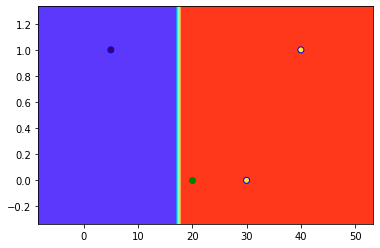

In [ ]:
plot_voronoi2d(clf, X, y, (50, 50))
plt.scatter(*test, c="g")
handmade_scaler = np.array([[-15, -15], [55, 55]])
#plt.scatter(*zip(*handmade_scaler))
plt.show()

In the code above, gender was very instignifcant, since nominally, its range was 40 times as small as the one of age. Below we compensate it by scaling. 

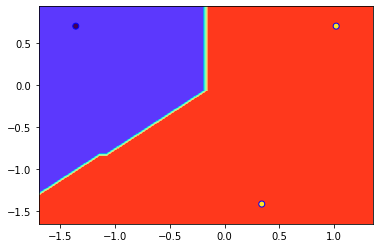

In [ ]:
X = StandardScaler().fit_transform(X)
clf = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto', metric="euclidean")
clf.fit(X, y)  
plot_voronoi2d(clf, X, y, (50, 50))
plt.show()

Now try KNN on randomly generated data

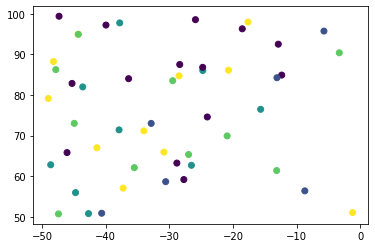

In [ ]:
x1 = np.random.sample(50)*50 - 50
x2 = np.random.sample(50)*50 + 50
X = np.hstack([x1.reshape(-1, 1), x2.reshape(-1, 1)])
y = np.random.randint(0, 5, len(x1))
plt.scatter(*zip(*X), c=y)

In [ ]:
X.shape

(50, 2)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

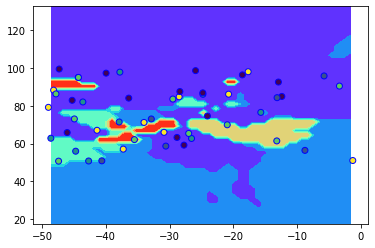

In [ ]:
xx1, xx2, Z = plot_voronoi2d(clf, X, y, (50, 50))
plt.show()

Below, we can extend this heatmap by the additional Z value in 3d. This value will be duplicated by color. 

In [ ]:
surface = go.Surface(x=xx1, y=xx2, z=Z)
fig = go.Figure(data=[surface])
fig.show()

Try clasterized points, generated by the standard sci-kit learn method. 

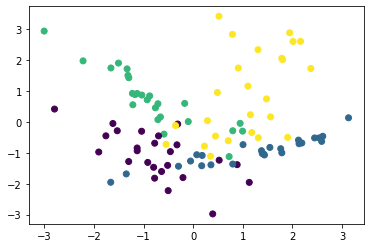

In [ ]:
X, y = make_classification(n_samples=100, n_features=2, n_classes=4, n_informative=2, n_redundant=0, n_clusters_per_class=1)
plt.scatter(*zip(*X), c=y)

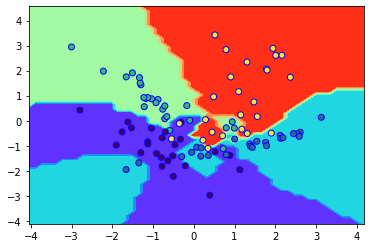

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)
xx1, xx2, Z = plot_voronoi2d(clf, X, y)
plt.show()

In [ ]:
xx1.shape, xx2.shape, Z.shape

((50, 50), (50, 50), (50, 50))

In [ ]:
surface = go.Surface(x=xx1, y=xx2, z=Z)
fig = go.Figure(data=[surface])
fig.show()

In [ ]:
import random

def make_clusters(n_classes, n_samples_pc):
  X, y = make_blobs(n_samples=n_samples_pc, n_features=2, centers=1)

  for i in range(n_classes-1):
    a, b = make_blobs(n_samples=20, n_features=2, centers=1) 
    a = a + random.randint(-10, 10)
    b = b + i + 1
    X = np.concatenate((X, a))
    y = np.concatenate((y, b))
  return X, y


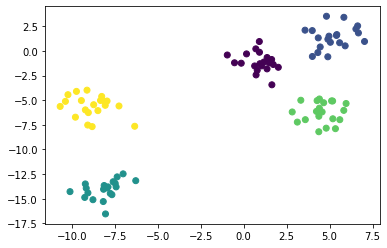

In [ ]:
X, y = make_clusters(5, 20)
plt.scatter(*zip(*X), c=y)

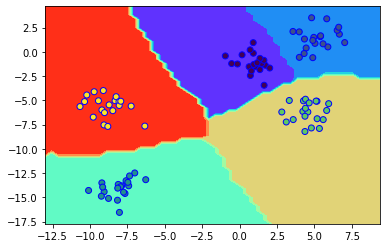

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)
xx1, xx2, Z = plot_voronoi2d(clf, X, y)
plt.show()

------------------------------------------


#Voronoi 3D

In [ ]:
def plot_voronoi3d(clf, X, y, shape=(30, 30, 30)):
  x1_botbound = X[:, 0].min() - X[:, 0].max()/3
  x1_topbound = X[:, 0].max() + X[:, 0].max()/3
  x2_botbound = X[:, 1].min() - X[:, 1].max()/3
  x2_topbound = X[:, 1].max() + X[:, 1].max()/3
  x3_botbound = X[:, 2].min() - X[:, 2].max()/3
  x3_topbound = X[:, 2].max() + X[:, 2].max()/3

  x1 = np.linspace(x1_botbound, x1_topbound, shape[0])
  x2 = np.linspace(x2_botbound, x2_topbound, shape[1])
  x3 = np.linspace(x2_botbound, x2_topbound, shape[2])
  xx1, xx2, xx3 = np.meshgrid(x1, x2, x3)

  Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel(), xx3.ravel()])
  Z = Z.reshape(shape)
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.scatter(xs=xx1, ys=xx2, zs=xx3, c=Z, alpha=0.5)
  return xx1, xx2, xx3, Z

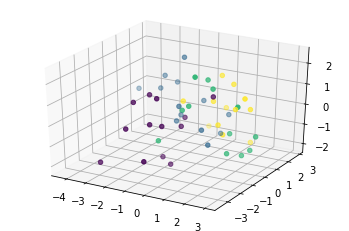

In [ ]:
X, y = make_classification(n_samples=50, n_features=3, n_classes=4, n_informative=2, n_redundant=0, n_clusters_per_class=1)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
to_plot = [*zip(*X)]
ax.scatter(xs=to_plot[0], ys=to_plot[1], zs=to_plot[2], c=y)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

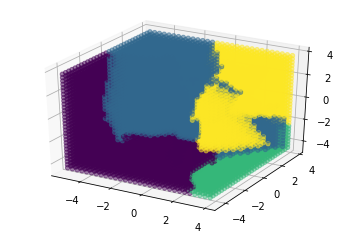

In [ ]:
xx1, xx2, xx3, Z = plot_voronoi3d(clf, X, y)

# Lab
## Graphics

In [ ]:

# scatter = go.Scatter3d(x=xx1, y=xx2, z=xx3, mode="markers",
#                        marker=dict(size=8, color=Z, opacity=0.5, colorscale='Viridis'))

surface = go.Surface(x=xx1, y=xx2, z=xx3)

fig = go.Figure(data=surface)
#fig.show()

In [ ]:
x = np.linspace(0, 1, 5)
y = np.linspace(0, 1, 5)
z = np.linspace(0, 1, 5)
c = np.random.randn(5)

xx, yy, zz = np.meshgrid(x, y, z)
xx.shape, yy.shape, zz.shape

((5, 5, 5), (5, 5, 5), (5, 5, 5))

In [ ]:
scatter = go.Scatter3d(x=xx, y=yy, z=zz, mode="markers",
                       marker=dict(size=8, color=c, opacity=0.5, colorscale='Viridis'))

fig = go.Figure(data=[scatter])
#fig.show()

-------------------------

## Working on stars. Packing and unpacking

In [ ]:
def myFunction(x, y):
    pass
    

In [ ]:
myFunction(5, 6)
myFunction(*[5, 6])


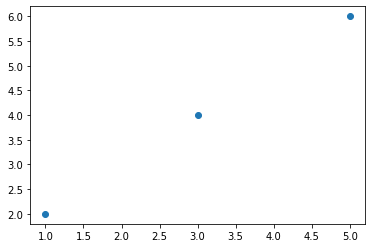

In [ ]:
x1 = [[1, 2], 
     [3, 4],
     [5, 6]
     ]
x2 = [[1, 3, 5], 
     [2, 4, 6]
     ]     
plt.scatter(*x2)  

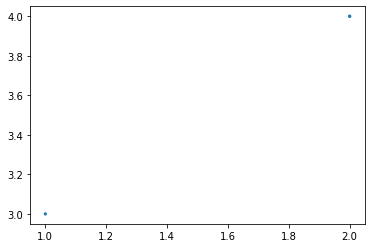

In [ ]:
plt.scatter(*x1) 
# The last point went to the third argument of scatter()

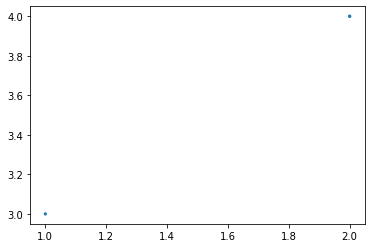

In [ ]:
plt.scatter(*[*x1])
# still draws 2 points. I need 3 

In [ ]:
x1, [*x1]

([[1, 2], [3, 4], [5, 6]], [[1, 2], [3, 4], [5, 6]])

In [ ]:
zippedStarX1 =zip(*x1)
zippedStarX1

In [ ]:
# Unpacking zip by star means to take all nexts from it
next(zippedStarX1), next(zippedStarX1)

((1, 3, 5), (2, 4, 6))

In [ ]:
[*zip(*x1)]

[(1, 3, 5), (2, 4, 6)]

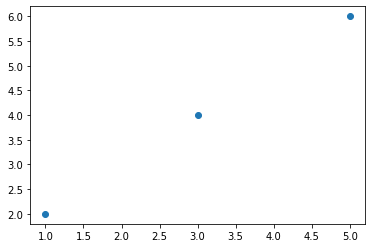

In [ ]:
plt.scatter(*zip(*x1))

Try numpy array with transpose